This notebook implements Linear Regression for multiple features of both linear and polynomial nature from scratch

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

**Multiple Linear Regression**

In [89]:
# If you wanna use one feature from california dataset
california = datasets.fetch_california_housing

X_train = california().data     # selecting training data
y_train = california().target   # selecting labels
X_train = X_train[0:100]        # selecting first 100 examples of first feature
y_train = y_train[0:100]        # selecting first 100 examples of first feature

print(X_train.shape)

(100, 8)


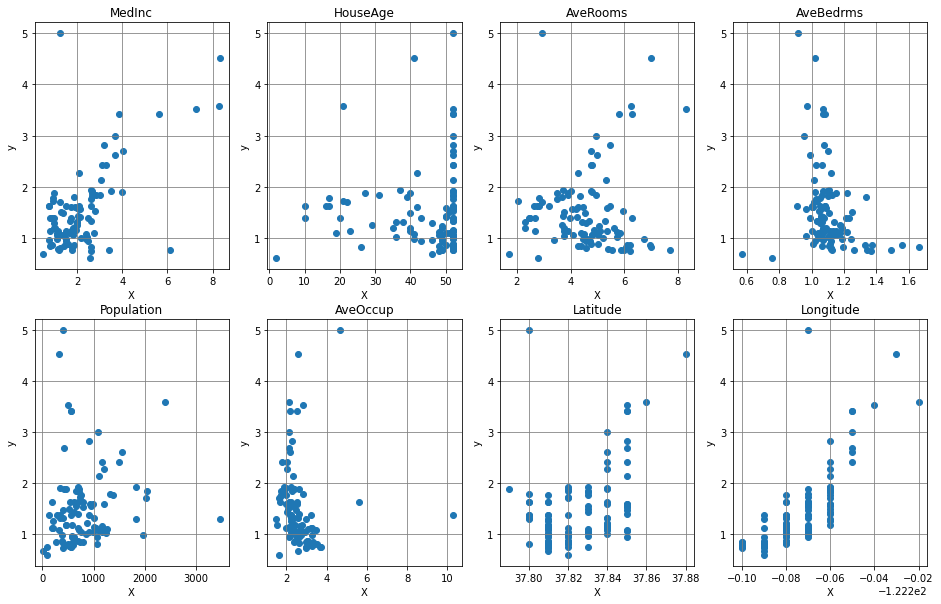

In [90]:
# Plotting all features vs training labels 
f_name = california().feature_names   # Names of all features, f_name: list

fig = plt.figure(figsize=(16, 10))
for i in range(1, len(X_train[0])+1):
  fig.add_subplot(2, 4, i)
  plt.scatter(X_train[:, i-1], y_train, marker="o")
  plt.title(f_name[i-1])              # Name of each feature
  plt.xlabel("X")
  plt.ylabel("y")
  plt.grid(True, color= "grey")
plt.show()

Formula for mean normalization: 
$X = \frac{X - \mu}  {max(X) - min(X)}$

In [91]:
# Feature scaling (mean normalization)
# X = (X - mu) / max(X) - min(X) 
for i in range(X_train.shape[1]):
  max_val = np.max(X_train[i])    # Extracting the max val from training data
  min_val = np.min(X_train[i])    # Extracting the min val from training data
  
  # Applying the formula column-wise i.e feature-wise
  X_train[:, i] = (X_train[:, i] - np.mean(X_train[:, i]))/(max_val-min_val)

Plotting the new scaled data

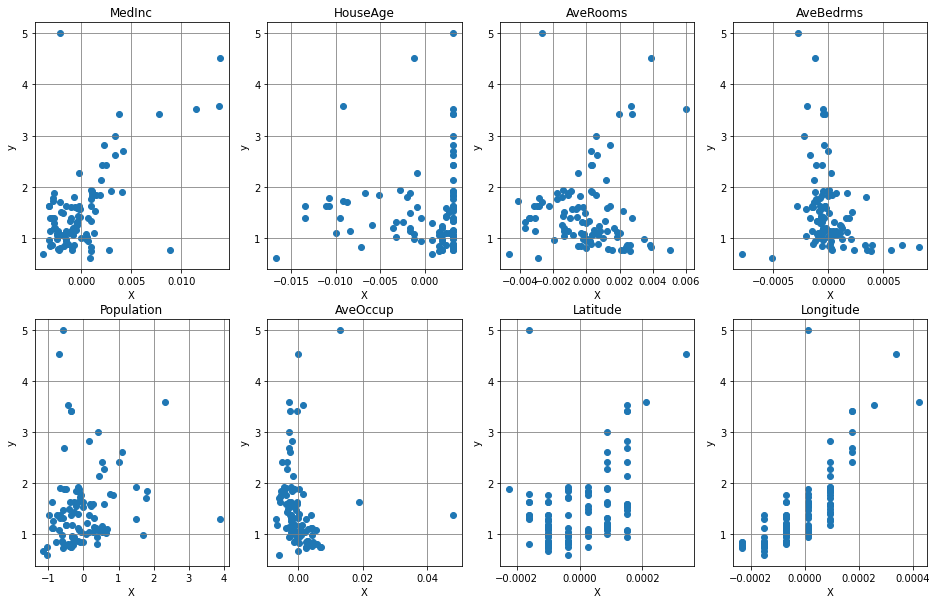

In [94]:
fig = plt.figure(figsize=(16, 10))
for i in range(1, len(X_train[0])+1):
  fig.add_subplot(2, 4, i)
  plt.scatter(X_train[:, i-1], y_train, marker="o")
  plt.title(f_name[i-1])
  plt.xlabel("X")
  plt.ylabel("y")
  plt.grid(True, color= "grey")
plt.show()

Cost function

In [95]:
# Function to calculate J (w, b) for a given weight and bias
def compute_cost(X, y, w, b):
  J = 0
  m, n = X.shape              # m: no of data, n: no of features
  y_hat = np.zeros([len(y)]) 

  for i in range(m):
    y_hat[i] = np.dot(X[i], w) + b  # every feature of ith row is multiplied to every weight 
    error = y[i] - y_hat[i]
    J+= error**2
  J*=(1/2*m)
  return J, y_hat

m, n = X_train.shape
w = np.zeros(n)
b = 0
total_cost, y_hat = compute_cost(X_train, y_train, w, b)  # cost fn called for some randomly initialized weight vector and bias

Function to calculate $\frac {\partial J} {\partial w} $ and 
$\frac {\partial J} {\partial b} $

In [96]:
# function to calculate gradient of cost function wrt to w and b for further use 
# in gradiemt descent algorithm, here y_hat is taken from above compute_cost()
def compute_grad(X, y, y_hat):
  m, n = X.shape

  d_by_dw_dj = np.zeros((n,))   # since weight is row vector dJ/dw is also a row vector of dim 1 x n
  d_by_db_dj = 0                # bias is scalar

  for i in range(m):
    for j in range(n):                         
      d_by_dw_dj[j] += (y_hat[i] - y[i]) * X[i, j]    
    d_by_db_dj = d_by_db_dj + y_hat[i] - y[i]                     
  d_by_db_dj *= 1/m                                
  d_by_db_dj *= 1/m                                

  return d_by_dw_dj, d_by_db_dj

d_by_dw_dJ, d_by_db_dJ = compute_grad(X_train, y_train, y_hat)

In [97]:
# Gradient descent algorithm, the three lists keep track of cost, weigh and bias
# observe how cost is decreasing if it isnt then tune lr (learning rate)
def grad_descent(X, y, y_hat, iteration, lr):
  m, n = X.shape
  itr = []
  J_itr = []

  w = np.zeros(n)                 # w vector is initialized to a 0 vector
  b = 0                           # bias is initialized to 0
  lr = lr                         # learning rate 
  for i in range(iteration):
    cost, y_hat = compute_cost(X, y, w, b)
    d_by_dw_dJ, d_by_db_dJ = compute_grad(X, y, y_hat)
    w = w - lr*(d_by_dw_dJ)       
    b = b - lr*(d_by_db_dJ)

    itr.append(i)
    J_itr.append(cost)

  return w, b, itr, J_itr, y_hat

iter = int(input("Enter the no. of iteration for which you want to run gradient descent: "))
w, b, itr, J_list, y_hat = grad_descent(X_train, y_train, y_hat, iter, 0.01)

Enter the no. of iteration for which you want to run gradient descent: 30000


In [98]:
print("Final cost is: ", J_list[-1])
print("Learned weight is: ", w[-1])
print("Learned bias is: ", b)

Final cost is:  2592.9592644260424
Learned weight is:  1.827874368634397
Learned bias is:  1.4419785558687883


Text(0, 0.5, 'Cost')

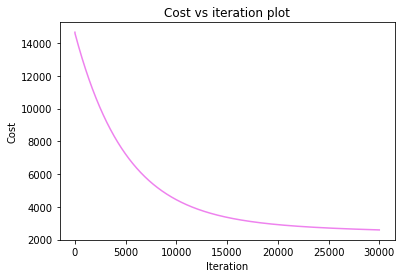

In [99]:
#Plotting Cost vs # of iterations to check if gradient descent is converging
plt.plot(itr, J_list, color = "violet")
plt.title("Cost vs iteration plot")
plt.xlabel("Iteration")
plt.ylabel("Cost")

In [109]:
# # Feature-wise plotting of prediction which is calculated implicitly  

# # hard-coded limits
# # x_limits = [[-0.005, 0.015], [-0.015, 0.005], [-0.005, 0.006], [-0.005, 0.010], [-0.008, 3], [-0.02, 0.015], [-0.0002, -0.0002], [-0.0003, 0.0002]]
# fig = plt.figure(figsize=(16, 14))
# for i in range(1, len(X_train[0])+1):
#   fig.add_subplot(3, 4, i)
#   plt.scatter(X_train[:, i-1], y_train, marker="o")
#   plt.scatter(X_train[:, i-1], y_hat, marker="o", color = "orange")
#   plt.title(f_name[i-1])
#   plt.xlabel("X")
#   plt.ylabel("y")
#   plt.xlim(x_limits[i-1])
#   # plt.ylim([-1, 5])
#   plt.grid(True, color= "grey")
# plt.show()

Multiple linear regression using scikit-learn library

In [12]:
from sklearn.linear_model import SGDRegressor

sgdr = SGDRegressor(max_iter=10000)
sgdr.fit(X_train, y_train)      # fitting the training data
print(sgdr)
print("number of iterations completed: ", sgdr.n_iter_)

b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print("model parameters: ", "\n w: ", w_norm, "\n b: ", b_norm)
print("learning rate: ", sgdr.alpha)

SGDRegressor(max_iter=10000)
number of iterations completed:  19
model parameters:  
 w:  [ 0.00618838  0.00034885  0.00060727 -0.0001696   0.11473938 -0.00082252
  0.00014041  0.00026539] 
 b:  [1.48448246]
learning rate:  0.0001


In [13]:
# make a prediction using w, b
y_pred = np.dot(X_train, w_norm) + b_norm   # this one uses the weights and bias using scikit-learn lib
y_pred_scratch = np.dot(X_train, w) + b     # this one uses the weights and bias "from scratch code"

print("Weight vector from scratch is: \n", w, "\n and bias is", b)
print("Weight vector from SGD is:", w_norm, "\n and bias is", b_norm)
print(f"Prediction on training set: \n{y_pred[:4]}" )
print(f"Prediction on training set using MR: \n{y_pred_scratch[:4]}" )
print(f"Target values \n{y_train[:4]}")

Weight vector from scratch is: 
 [14.53101803  0.85042586  1.24139784 -0.41637075  0.12529617 -1.83621113
  0.33272451  0.64017357] 
 and bias is 0.9592835680309986
Weight vector from SGD is: [ 0.00618838  0.00034885  0.00060727 -0.0001696   0.11473938 -0.00082252
  0.00014041  0.00026539] 
 and bias is [1.48448246]
Prediction on training set: 
[1.40475286 1.75184944 1.43378951 1.44411705]
Prediction on training set using MR: 
[1.0778431  1.45301366 1.07798907 1.03439159]
Target values 
[4.526 3.585 3.521 3.413]


Target versus prediction using mean normalized model and regression using scikit learn 


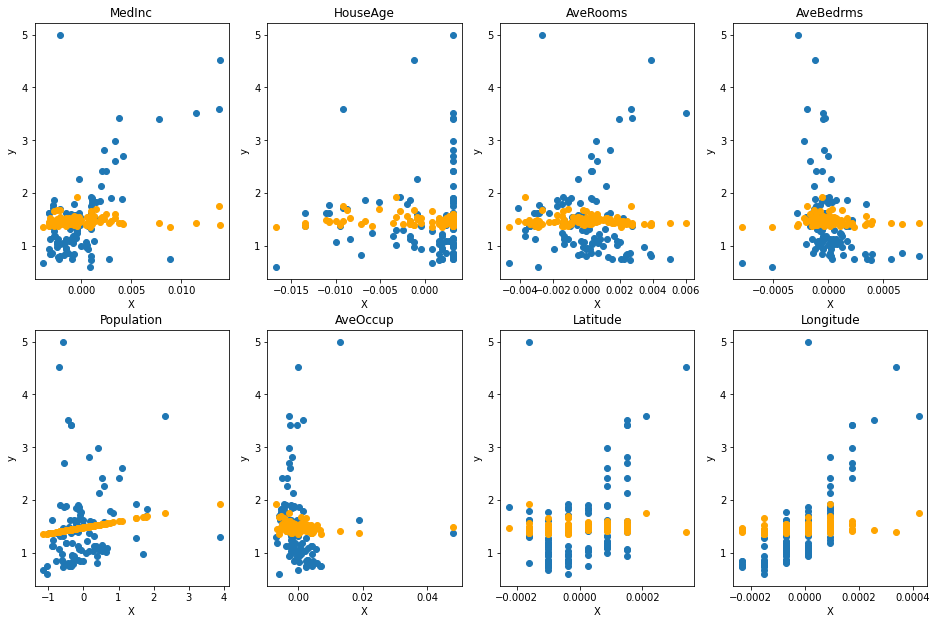

In [14]:
print("Target versus prediction using mean normalized model and regression using scikit learn ")
fig = plt.figure(figsize=(16, 16))
for i in range(1, len(X_train[0])+1):
  fig.add_subplot(3, 4, i)
  plt.scatter(X_train[:, i-1], y_train, marker="o")
  plt.scatter(X_train[:, i-1], y_pred, marker="o", color="orange")
  plt.title(f_name[i-1])
  plt.xlabel("X")
  plt.ylabel("y")
plt.show()

Target versus prediction using mean normalized model and regression codedfrom scratch 


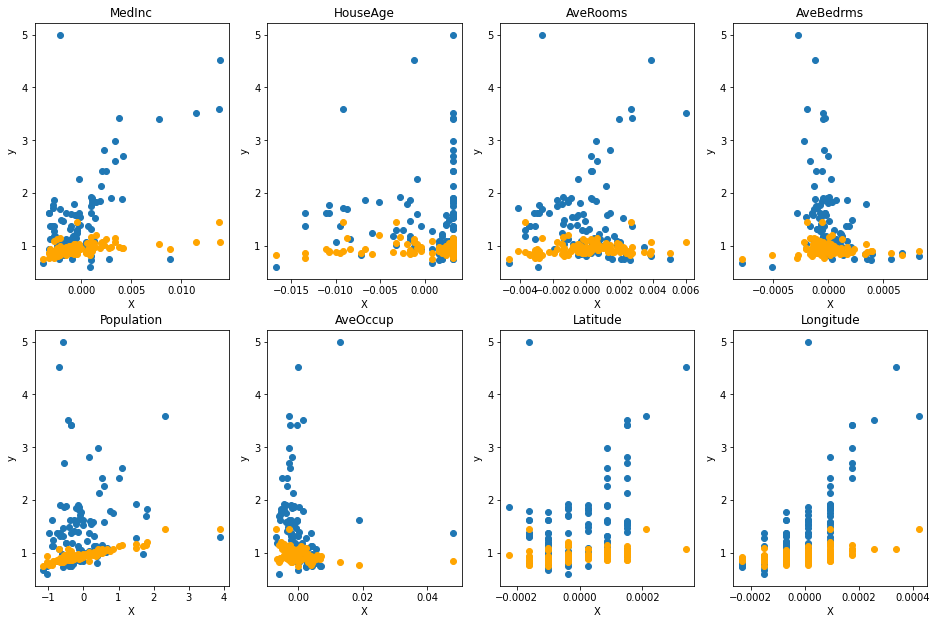

In [15]:
print("Target versus prediction using mean normalized model and regression codedfrom scratch ")
fig = plt.figure(figsize=(16, 16))
for i in range(1, len(X_train[0])+1):
  fig.add_subplot(3, 4, i)
  plt.scatter(X_train[:, i-1], y_train, marker="o")
  plt.scatter(X_train[:, i-1], y_pred_scratch, marker="o", color="orange")
  plt.title(f_name[i-1])
  plt.xlabel("X")
  plt.ylabel("y")
plt.show()

In [16]:
print("Final cost using Multiple Linear regression: ", J_list[-1])
print("Final cost using sklearn's SGDregressor: ", compute_cost(X_train, y_train, w_norm, b_norm)[0])

Final cost using Multiple Linear regression:  4435.191550420311
Final cost using sklearn's SGDregressor:  3100.878157487224


**Polynomial Regression**

To accomplish polynomial regression, we can modify the input data to engineer the needed features according to target values If we concatenate the original data with a version that squares and cubes the 𝑥 value, then we can achieve something close to $𝑦 = 𝑤 𝑥^2 + 𝑏$, here we have engineered our feature by $𝑦 = 𝑤_0𝑥_0 + 𝑤_1𝑥_1^2+ 𝑤_2𝑥_2^3 + 𝑏$ the gradient descent algorithm should assign a lower weight to w_0 and w_2

In [53]:
X_poly_train = np.arange(0, 20)   # X_poly_train is single feature vector, m=20, n=1
y_poly_train = X_poly_train**2    # Given target value
X_poly = np.c_[X_poly_train, X_poly_train**2, X_poly_train**3]   # Feature engineering here concatenate non linear data since y = x_train^2
  
print(X_poly.shape)

(20, 3)


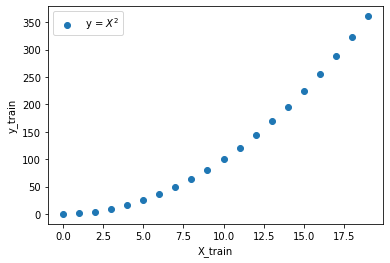

In [63]:
plt.scatter(X_poly_train, y_poly_train, label="y = $X^2$")
plt.xlabel("X_train")
plt.ylabel("y_train")
plt.legend()

In [79]:
iter = int(input("Enter the no. of iteration for which you want to run gradient descent: "))
w_poly, b_poly, itr, J_list_poly, y_hat_poly = grad_descent(X_poly, y_poly_train, y_hat, iter, 1e-8)  # lr = 1e-8

Enter the no. of iteration for which you want to run gradient descent: 30000


Text(0, 0.5, 'Cost')

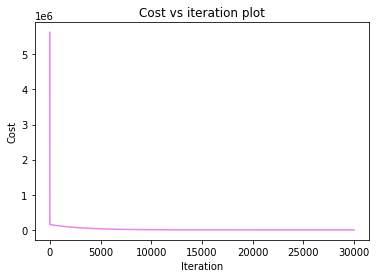

In [80]:
#Plotting Cost vs # of iterations to check if gradient descent is converging
plt.plot(np.arange(0, iter), J_list_poly, color = "violet")
plt.title("Cost vs iteration plot")
plt.xlabel("Iteration")
plt.ylabel("Cost")

In [81]:
print(y_poly_train)
print(X_poly)
print("weights: ", w_poly)
print(" Observe how w0 and w2 have smaller value cpmpared to w1, this is beause " 
"the reln between training data and target is y = x^2, so w1 which is the coeff of x^2 is higher")
print(b_poly)

[  0   1   4   9  16  25  36  49  64  81 100 121 144 169 196 225 256 289
 324 361]
[[   0    0    0]
 [   1    1    1]
 [   2    4    8]
 [   3    9   27]
 [   4   16   64]
 [   5   25  125]
 [   6   36  216]
 [   7   49  343]
 [   8   64  512]
 [   9   81  729]
 [  10  100 1000]
 [  11  121 1331]
 [  12  144 1728]
 [  13  169 2197]
 [  14  196 2744]
 [  15  225 3375]
 [  16  256 4096]
 [  17  289 4913]
 [  18  324 5832]
 [  19  361 6859]]
weights:  [0.14846847 0.96842171 0.00134388]
 Observe how w0 and w2 have smaller value cpmpared to w1, this is beause the reln between training data and target is y = x^2, so w1 which is the coeff of x^2 is higher
4.713507106778486e-05


Text(0, 0.5, 'y')

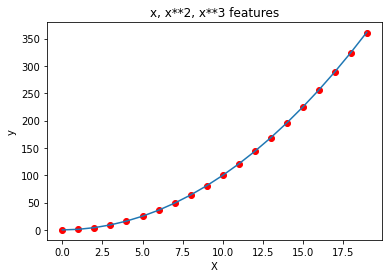

In [82]:
plt.scatter(X_poly_train, y_poly_train, marker='o', c='r', label="Actual Value"); plt.title("x, x**2, x**3 features")
plt.plot(X_poly_train, np.dot(X_poly, w_poly) + b_poly)

plt.xlabel("X")
plt.ylabel("y")

In [83]:
print(J_list_poly[-1])

17.092870386757156


**Polynomial regression on a huge dataset with features (before feature engineering) > 2**




In [85]:
X_poly_mult = np.c_[X_train, np.exp(X_train)]     # feature engineering 
# concatenates columns , 8 cols of X_train + 8 cols of e^X_train

Final cost is: 3071.32547556882


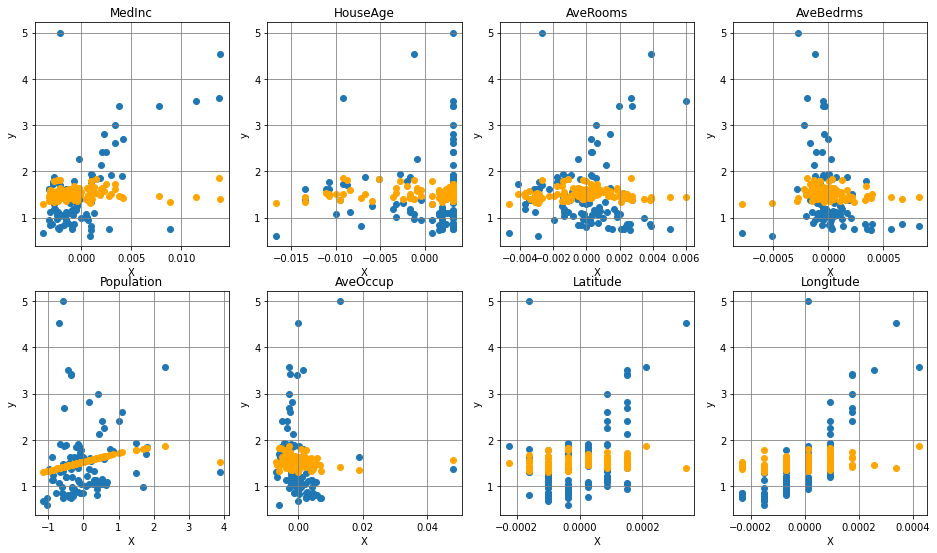

In [86]:
iter = 30000
w_poly, b_poly, itr, J_list_poly, y_hat_poly = grad_descent(X_poly_mult, y_train, y_hat, iter, 1e-5)  # lr = 1e-5
y_pred = np.dot(X_poly_mult, w_poly) + b_poly     # this one uses the weights and bias "from scratch code"

print("Final cost is:", J_list_poly[-1])

fig = plt.figure(figsize=(16, 14))
for i in range(1, len(X_train[0])+1):
  fig.add_subplot(3, 4, i)
  plt.scatter(X_train[:, i-1], y_train, marker="o")
  plt.scatter(X_train[:, i-1], y_pred, marker="o", color="orange")
  plt.title(f_name[i-1])
  plt.xlabel("X")
  plt.ylabel("y")
  plt.grid(True, color= "grey")
plt.show()

As we can see applying polynomial regression just 